In [62]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
def doPlot():
    crimedataLocation = 'D:/AI/Project1/Shape/crime_dt.shp' 
    gridsize = 0.002
    crimedata = gpd.read_file(crimedataLocation)
    #print(crimedata)
    
    #crimedata.plot()
    bounds=np.array([[-73.59,45.49],[-73.55,45.49],[-73.55,45.53],[-73.59,45.53]])
    long,lat = bounds.T
    gridx = np.arange(min(long),max(long),gridsize)
    gridy = np.arange(min(lat),max(lat),gridsize)
    #print(gridx)
    #print(gridy)
    H, xedges, yedges = np.histogram2d(crimedata['geometry'].x, crimedata['geometry'].y,bins=[gridx, gridy])
    print(H.shape)
    plt.figure()
    #plt.plot(x,y,'ro')
    #plt.grid(True)
    #plt.figure()
    myextent  =[xedges[0],xedges[-1],yedges[0],yedges[-1]]
    plt.imshow(H.T,origin='low',extent=myextent,interpolation='nearest',aspect='auto')
    #plt.plot(x,y,'ro')
    #plt.colorbar()
    #plt.scatter(x,y,100,'r')
    plt.show()
    return H,xedges,yedges


(20, 19)


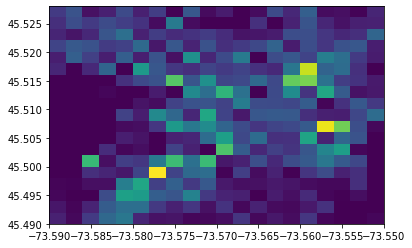

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   1.   1.   2.   2.   2.   2.   3.   3.   3.   4.   4.   4.
   5.   5.   5.   5.   5.   5.   5.   5.   6.   6.   6.   6.   6.   6.
   6.   7.   8.   8.   8.   9.   9.   9.   9.   9.   9.   9.   9.  10.
  10.  10.  10.  11.  11.  11.  11.  11.  11.  12.  12.  12.  12.  14.
  14.  14.  15.  15.  15.  16.  16.  16.  17.  17.  18.  18.  18.  18.
  19.  19.  19.  19.  19.  20.  21.  21.  21.  21.  21.  21.  22.  23.
  23.  23.  23.  23.  23.  24.  24.  24.  24.  24.  25.  25.  25.  25.
  25.  25.  25.  25.  27.  27.  27.  27.  28.  28.  28.  29.  29.  29.
  29.  30.  30.  30.  30.  30.  31.  31.  31.  31.  32.  32.  32.  33.
  34.  35.  35.  37.  37.  37.  38.  38.  38.  38.  38.  39.  39.  39.
  39. 

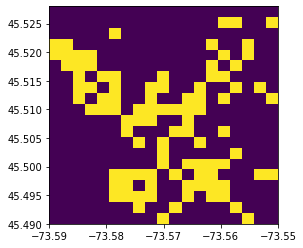

In [194]:
if __name__=="__main__":
    H,xedges,yedges = doPlot()
    threshold_limit = thresholdCalc(H)
    print(threshold_limit)
    reversesorted_array = H;
    reversesorted_array[reversesorted_array < threshold_limit] = 0
    reversesorted_array[reversesorted_array >= threshold_limit] = 1
    print(reversesorted_array)
    plt.imshow(reversesorted_array,extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

In [193]:
def thresholdCalc(H):
    threshold = int(75)
    #reversesorted_array = -np.sort(-H)
    sorted_array = H.reshape(1,-1)
    sorted_array.sort()
    
    #reverse_sort = np.fliplr(H)
    #reverse_sort = sorted_array[::-1]
    numberOfElements = np.size(H,1)
    #calchighrisk = np.divide(threshold,100)
    print(sorted_array[0])
    highriskNum = sorted_array[0][int(threshold/100 * sorted_array.shape[1])]
    print(highriskNum)
    return int(highriskNum)
    
    
